# Modelagem da Disseminação de Fake News e Informação Viral utilizando Equações Diferenciais Ordinárias

>Ênio Henrique Nunes Ribeiro (ehnr)

>Matheus Augusto monte Silva (mams4)

>Thiago Jose Grangeiro Costa (tjgc)

>Victória Xavier Queiroz (vxq)

# Resumo

As fake news não são um problema recente; entretanto, tomaram grandes proporções nos últimos anos devido à velocidade da disseminação desse tipo de informação em meios digitais. Diante disso, o grupo decidiu abordar essas questões explorando diferentes modelos de Equações Diferenciais Ordinárias (EDOs). Primeiramente, foi usado o modelo ISTK e, a partir dele, exploramos o modelo SIR, visto que o primeiro é baseado no segundo e enfrentamos dificuldades com o primeiro modelo. Em seguida, o grupo criou um modelo próprio para fins comparativos com os dois modelos anteriores. A partir disso, pôde-se analisar bem os detalhes de todos os modelos e tirar conclusões sobre o comportamento das *fake news*.

Palavras-chave: *ODE*s, *Fake News*, Disseminação de informação

# Introdução

Os seres humanos, quando comparados a outras espécies do Reino Animal, revelam uma notável fragilidade. No entanto, o desenvolvimento da racionalidade desempenhou um papel fundamental em sua sobrevivência e subsequente êxito evolutivo. Esse êxito é grandemente atribuído à capacidade humana de comunicação e cooperação em busca de objetivos comuns.

No livro "*Sapiens*", o renomado antropólogo e historiador Yuval Noah Harari destaca a função evolutiva da "fofoca" no desenvolvimento da sociedade moderna, evidenciando que rumores e boatos desempenharam um papel essencial na seleção de parceiros ou na identificação de áreas de caça mais abundantes [1]. Nesse contexto, é pertinente observar que os boatos podem abarcar tanto a verdade quanto a falsidade, acarretando, assim, em resultados que variam desde o sucesso em uma empreitada de caça até o embate fatal com uma armadilha, resultando na aniquilação da tribo. Assim, percebe-se claramente que os sapiens foram constantemente desafiados a discernir entre rumores verídicos e equivocados, visto que o desfecho desse discernimento se afigurava crucial para a sobrevivência da espécie.

Este dilema persiste até os dias atuais, uma vez que desde a infância, somos instruídos a lidar com rumores e boatos nas instituições sociais das quais fazemos parte, incluindo, porém não limitando-se, a igreja e a escola. No entanto, recentemente, tal problemática atingiu proporções mais amplas ao exercer influência tanto em processos eleitorais como no âmbito do enfrentamento da pandemia de *SARS-CoV-2*, através da disseminação das denominadas *Fake News*, ou seja, notícias falsas, que são predominantemente difundidas nas plataformas de mídia social com a intenção de manipular a opinião pública.

Nesse contexto, surge a necessidade de investigar e compreender o alcance e a influência que tais informações podem exercer sobre determinadas populações, a fim de estabelecer medidas para a contenção desses conteúdos, salvaguardando o livre-arbítrio dos indivíduos e contribuindo para a tomada de decisões mais informadas.

# Objetivos
Neste projeto, buscamos entender como os rumores e boatos se espalham, usando Equações Diferenciais Ordinárias (ODEs), a fim de prever e criar medidas contra a disseminação de desinformação.

Nesse contexto, descobrir o quão "viral" uma informação falsa pode se tornar pode ajudar as autoridades e as plataformas online, como as redes sociais, a tomarem providências contra a sua proliferação.


# Metodologia

Foram utilizados 3 modelos, os quais projetam a disseminação das fake news. Todos os modelos têm como base o modelo de disseminação de doenças infecciosas SIR. Dessa forma, as informações se propagam como doenças na natureza.

O primeiro modelo é o mais simples, pois, assim como o modelo SIR, admite 3 equações diferenciais ordinárias para 3 classes da população. Já o segundo modelo é mais complexo, pois inclui uma nova classe na população e utiliza de parâmetros estatíscos para disseminação de rumores em circulos sociais. O terceiro modelo apresentado, é um aprimoramento do primeiro, incluindo agora uma nova classe da população responsável por combater a desinformação disseminada em meios digitais.


#Mapa Mental

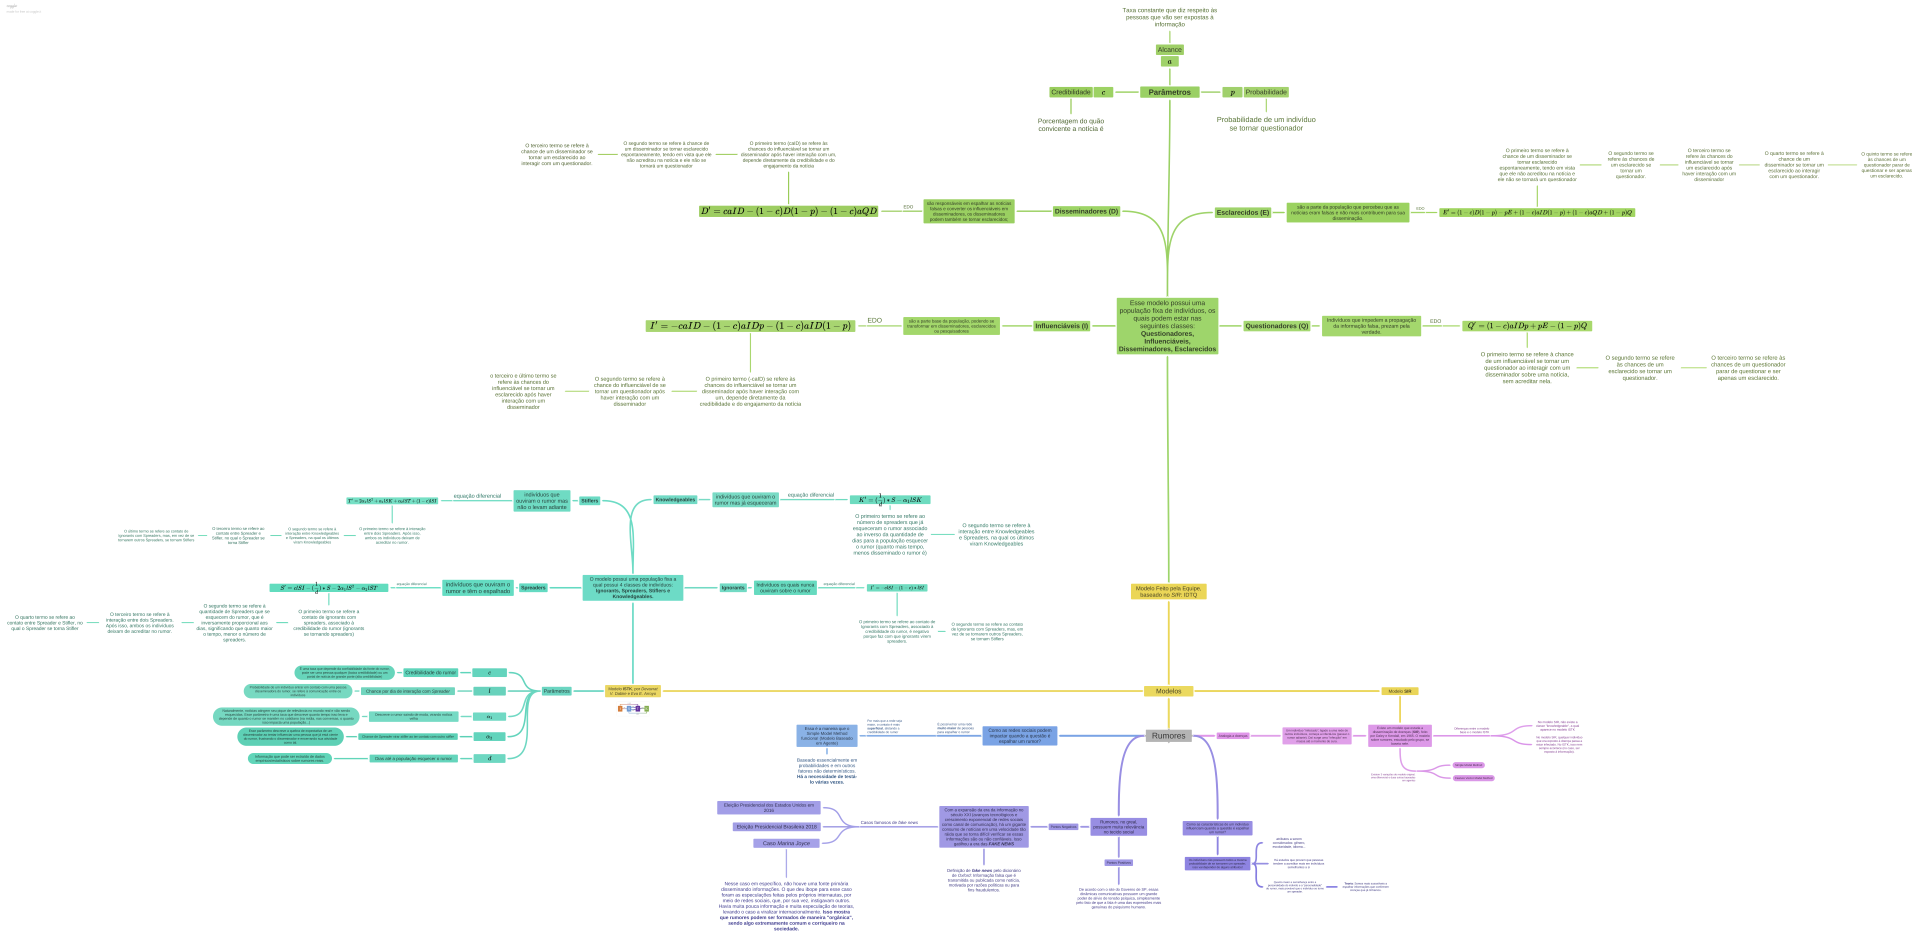

https://coggle.it/diagram/ZRSndyssZN_KmxkG/t/-/e0e6983da59317aa1bc52d745f21b01a4a22fea93d73fb4def73e72ac1e07ca8

## Modelo IDE
O modelo SIR tradicional divide a população em 3 classes, atribuindo a cada uma
uma equação diferencial. Nesse modelo, temos os sucetíveis, infectados e
recuperados, e dois parâmetros essenciais, a taxa de contato e a taxa de recuperação

No modelo proposto, as classes foram renomeadas para se adequarem ao contexto de disseminação de informação e não mais em contágio viral. dessa maneira, as classes são:

* Os influencíaveis (I), análogos aos Sucetíveis, são a parte base da população, podendo se transformar em disseminadores ou esclarecidos;

* Os disseminadores (D), parecidos com os infectados,  são o núcleo do modelo, eles são responsáveis em espalhar as notícias falsas e converter os influenciáveis em disseminadores, os disseminadores podem também se tornar esclarecidos;

* Os esclarecidos (E), assim como os recuperados, são a parte da população que percebeu que as notícias eram falsas e não mais contribuem para sua disseminação.

  Dessa maneira, temos o modelo:

  > $I' = -aID $

  O único termo representa a interação entre Influenciáveis e Disseminadores, no qual todos os que tiveram essa interação se tornam Disseminadores

  > $D' = aID\ \ -(1-c)D $

  O primeiro termo representa a interação entre Influenciáveis e Disseminadores, no qual todos os que tiveram essa interação se tornam Disseminadores e o segunto termo se refere aos Disseminadores que espontaneamente deixam de disseminar, se tornando Esclarecidos.

  > $E' = (1-c)D $

  O único termo se refere aos Disseminadores que espontaneamente deixam de disseminar, se tornando Esclarecidos.

Para os parâmetros, foi-se adotado dois principais baseados em probabilidades e estudos estatísticos:

* o parâmetro *a* representa o alcance médio da postagem, ou seja, análogo a taxa de contato

* o parametro *c* representa a credibilidade da notícia, de maneira que *(1-c)* representa a taxa de alguém não acreditar na noticia e portanto de se "recuperar".

> $a = \frac{1}{N} $

> $c = 0.8$

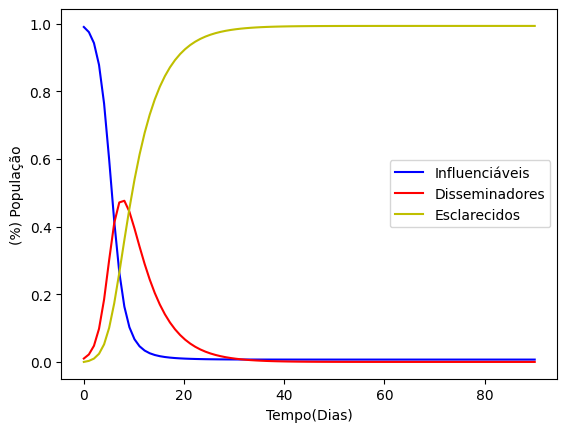

In [ ]:
import numpy as np;
from scipy.integrate import odeint
import matplotlib.pyplot as plt;


# influenciáveis i
# disseminadores d
# Esclarecidos e
# questionadores q

def modelo(x, t, a, c):
  I, D, E = x
  dIdt = -a*I*D
  dSdt = a*I*D - (1-c)*D
  dEdt = (1-c)*D
  return dIdt, dSdt, dEdt

N = 100 #quantidade média de amigos
D0, E0 = 1, 0
I0 = N - D0 - E0
y0 = I0, D0, E0

d = 30 #quantidade de dias

#parametros
alcance = 1/N
credibilidade = 0.80

t = np.linspace(0, 90, 90)

X = odeint(modelo, y0, t, args = (alcance, credibilidade))
I, D, E = X.T

plt.plot(t, I/N, 'b',  label = 'Influenciáveis')
plt.plot(t, D/N, 'r',  label = 'Disseminadores')
plt.plot(t, E/N, 'y',  label = 'Esclarecidos')
plt.xlabel('Tempo(Dias)')
plt.ylabel('(%) População')
# ax.set_ylim(0,1.2)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
# legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
plt.legend()
plt.show()

## Modelo ISTK

O Modelo ***ISTK*** apresenta quatro categorias para a população

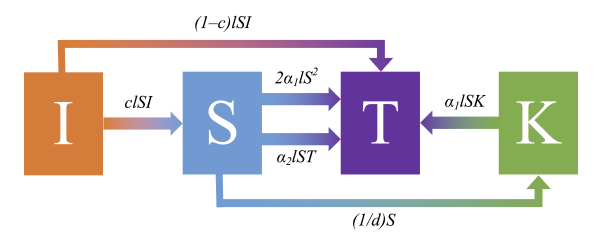

Para os *ignorants*, temos:
> $ I' = -clSI\ \  - (1 - c)lSI $

Para os *spreaders*, temos:
> $ S' = clSI\ \  − (\frac{1}{d})S\ \  −  2α_1lS^2\ \  −  α_2lST $

Para os *stiflers*, temos:
> $ T' =  2α_1lS^2\ \  + α_1lSK\ \ + α_2lST\ \ + (1 − c)lSI $

Para os *knowledgeables*, temos:
> $ K' = (\frac{1}{d})S\ \ − α_1lSK $

Para os parâmetros, temos:
> $ c = \frac{2.8}{7} $

> $ l = 1 - (\frac{1-S}{N})^{22} $

> $ α_1 = 0.01 $

> $ α_2 = 0.02 $

> $ d = 8 $

###Estimação de parâmetros

Para estimar, foram essenciais os seguintes parâmetros: a credibilidade ($c$) do rumor, cujo valor foi determinado após consulta a diversas fontes de informação [2]; o período em dias ($d$) antes do qual o rumor é esquecido; e as taxas de interações diárias com os dissiminadores ($l$). Além destes, a inclusão de um parâmetro que introduzisse uma "taxa de novidade" para o rumor ($α_1$) tornou-se imprescindível, bem como a probabilidade de conversão de spreaders em stiflers ($α_2$).


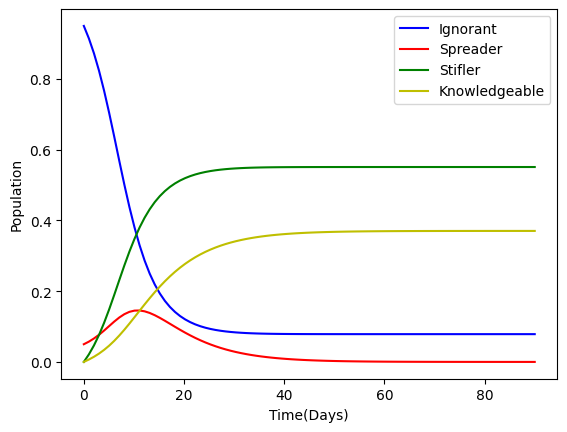

In [ ]:
#Mostrar os gráficos do modelo ISTK
import numpy as np;
from scipy.integrate import odeint
import matplotlib.pyplot as plt;

def odes (x, t):
  I = x[0] #Ignorants
  S = x[1] #Spreaders
  T = x[2] #Stiflers
  K = x[3] #Knowledgeables
  N = I + S + T + K

  c = 0.4 #Credibiidade do rumor
  l = 1-(1-S/N)**22 #Chance por dia de interação com Spreader
  a1 = .01 #Descreve o rumor saindo de moda, virando noticia velha
  a2 = .02 #Chance de Spreader virar stifler ao contato com um stifler
  d = 8 # Dias até a população esquecer o rumor

  dIdt = -c*l*S*I - (1-c)*l*S*I
  dSdt = c*l*S*I - (1/d)*S - 2*a1*l*(S**2) - a2*l*S*T
  dTdt = 2*a1*l*(S**2) + a1*l*S*K + a2*l*S*T + (1 - c)*l*S*I
  dKdt = (1/d)*S - a1*l*S*K
  return [dIdt, dSdt, dTdt, dKdt]


x0 = [0.95, 0.05, 0, 0]
N = 0
for x in x0:
  N += x

t = np.linspace(0, 90, 90)
X = odeint(odes, x0, t)
plt.plot(t, X[:,0]/N, 'b', label = 'Ignorant')
plt.plot(t, X[:,1]/N, 'r', label = 'Spreader')
plt.plot(t, X[:,2]/N, 'g', label = 'Stifler')
plt.plot(t, X[:,3]/N, 'y', label = 'Knowledgeable')
plt.xlabel('Time(Days)')
plt.ylabel('Population')
plt.legend()
plt.show()

## Modelo IDEQ

Tendo como inspiração o modelo ISTK, o modelo IDEQ é um aprimoramento do modelo IDE já discutido, entretanto, mostou-se necessária a inclusão de um nova classe.
Essa classe, chamada de "Questionadores", interage com as classes já descritas informado-as que a informação é falsa, combatendo sua proliferação. Os questionadores podem ser ignorantes que pesquisaram antes de compartilhar a publicação ou esclarecidos que decidiram denunciar postagens ou informar parentes e ou amigos que a informação é falsa, dessa maneira, diminuindo a quantidade de disseminadores. Entretanto, os quetionadores não fazem isso para sempre e em algum momento voltam a ser parte da população esclarecida.

Com isso, temos o modelo:

> $ I' = -caID\ \ -(1-c)aIDp\ \ -(1-c)aID(1-p) $

O primeiro termo se refere aos influenciáveis que se tornaram Disseminadores após haver interação com um Disseminador, depende diretamente da credibilidade e do engajamento da notícia; O segundo termo se refere à chance do influenciável se se tornar um questionador após haver interação com um disseminador, e o terceiro e último termo se refere às chances do influenciável se tornar um esclarecido após haver interação com um disseminador.

> $ D' = caID\ \ -(1-c)D(1-p)\ \ -(1-c)aQD $

O primeiro termo se refere aos influenciáveis que se tornaram Disseminadores após haver interação com um Disseminador; O segundo termo se refere à chance de um disseminador se tornar esclarecido espontaneamente, tendo em vista que ele não acreditou na notícia e ele não se tornará um questionador e o terceiro termo se refere à chance de um disseminador se tornar um esclarecido ao interagir com um questionador.

> $ E' = (1-c)D(1-p)\ \ -pE\ \ +(1-c)aID(1-p)\ \ +(1-c)aQD\ \ +(1-p)Q $

O primeiro termo se refere à chance de um disseminador se tornar esclarecido espontaneamente, tendo em vista que ele não acreditou na notícia e ele não se tornará um questionador; O segundo termo se refere às chances de um esclarecido se tornar um questionador; O terceiro termo se refere às chances do influenciável se tornar um esclarecido após haver interação com um disseminador;O quarto termo se refere à chance de um disseminador se tornar um esclarecido ao interagir com um questionador e o quinto termo se refere às chances de um questionador parar de questionar e ser apenas um esclarecido.

> $ Q' = (1-c)aIDp\ \ +pE\ \ -(1-p)Q $

O primeiro termo se refere à chance de um influenciável se tornar um questionador ao interagir com um disseminador sobre uma notícia, sem acreditar nela; O segundo termo se refere às chances de um esclarecido se tornar um questionador e o terceiro termo se refere às chances de um questionador parar de questionar e ser apenas um esclarecido.

Nesse novo modelo, foi incluído um novo parâmetro *p* que representa a probabilidade de um indivíduo pesquisar a veracidade da notícias antes de compartilhar, o qual definimos como 20% de chance.

> $p = 0.2$

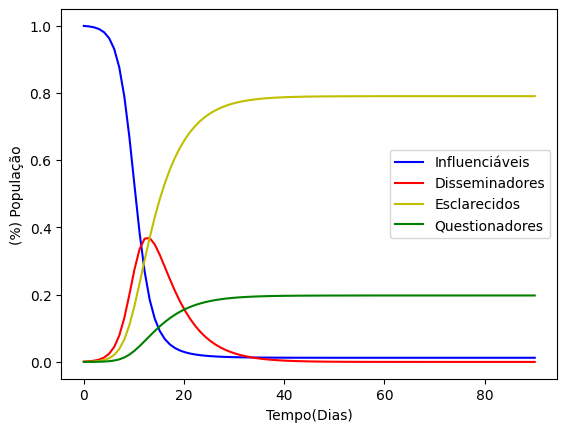

In [ ]:
import numpy as np;
from scipy.integrate import odeint
import matplotlib.pyplot as plt;


# influenciáveis i
# disseminadores d
# Esclarecidos a
# questionadores q

def modelo(x, t, a, c, p):
  I, D, E, Q = x
  dIdt = -c*a*I*D -(1-c)*a*I*D*p -(1-c)*a*I*D*(1-p)
  dDdt =  c*a*I*D -(1-c)*D*(1-p) -(1-c)*a*Q*D
  dEdt =  (1-c)*D*(1-p) - p*E + (1-c)*a*I*D*(1-p) + (1-c)*a*Q*D + (1-p)*Q
  dQdt =  (1-c)*a*I*D*p + p*E - (1-p)*Q
  return dIdt, dDdt, dEdt, dQdt

N = 1000 #quantidade média de amigos
D0, E0, Q0 = 1, 0, 0
I0 = N - D0 - E0 - Q0
y0 = I0, D0, E0, Q0

d = 30 #quantidade de dias


alcance = 1/N
credibilidade = 0.8
questionadores = 0.2

t = np.linspace(0, 90, 90)

X = odeint(modelo, y0, t, args = (alcance, credibilidade, questionadores))
I, D, E, Q = X.T

plt.plot(t, I/N, 'b',  label = 'Influenciáveis')
plt.plot(t, D/N, 'r',  label = 'Disseminadores')
plt.plot(t, E/N, 'y',  label = 'Esclarecidos')
plt.plot(t, Q/N, 'g',  label = 'Questionadores')
plt.xlabel('Tempo(Dias)')
plt.ylabel('(%) População')
plt.legend()
plt.show()

# Análise e Discussão




## Análise do Modelo IDE

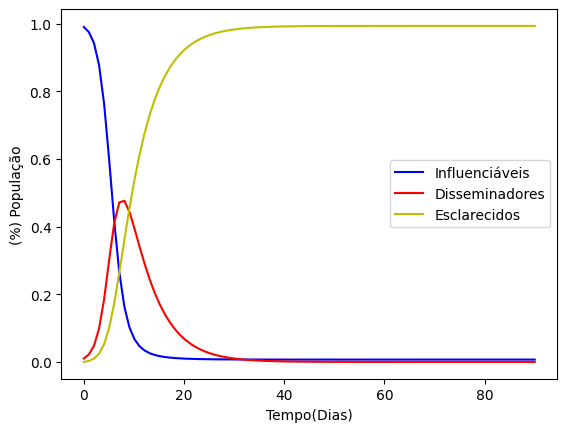

Pelo modelo IDE, mas parecido com o modelo SIR podemos observar um aumento muito rápido dos disseminadores nas primeiras semanas, alcançando uma marca de quase 50% da população como disseminadores. Somado a isso, a porcentagem da população Influenciável diminui drasticamente enquanto ja nos primeiros dias vemos o aumento da população esclarecida, consciente da verdade.


## Análise do Modelo ISTK

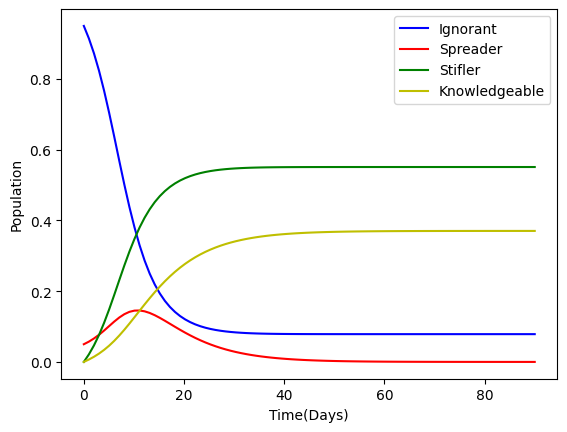

No modelo ISTK vemos curvas mais suaves enquanto a população *spreader* tem um aumento minimo, não pasando de 20% da população. É notável também que a população *ignorant* não chega a 0, diferentemente do modelo IDE. Isso se deve a presença dos  *knowledgeables* que exercem grande papel para diminuir o senso de novidade associado ao rumor, tornando-o "obsoleto", diminuindo sua disseminação entre a população *ignorant*.

## Análise do Modelo IDEQ

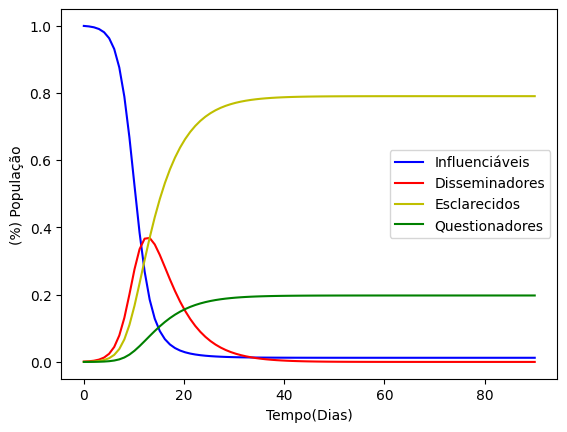

Com o aprimoramento do modelo IDE, podemos observar que, assim como no modelo ISTK, o aumento da população disseminadora é menor devido a presença dos Questionadores, porém o tempo necessário para estabilizar é relativamente maior. É importante observar que a população ignorante também não chega a 0, dessa maneira, pode-se inferir que existem pessoas que não entraram em contato com a *fake news*.


Com isso, podemos observar que o modelo ISTK tem um comportamento mais otimista se comparado ao modelo IDEQ, proposto no projeto. Isso se deve a falta de dados estatísticos para a calibração dos parâmetros do modelo. Entretanto, é importante destacar que o modelo ISTK trata de rumores em círculos sociais, enquanto o modelo IDEQ, trata da disseminação da informação no meio digital, e portanto, mais rápida e levando maior tempo para a estabilização pois a informação na internet é perpetúa.

# Conclusão

A modelagem da disseminação de *Fake News* e informações virais, usando Equações Diferenciais Ordinárias (ODEs), ajuda a compreender os fatores que afetam esses fenômenos, incluindo a velocidade de compartilhamento e a influência das redes sociais. Essa abordagem permite prever cenários e desenvolver estratégias para mitigar os efeitos negativos, contribuindo para uma sociedade mais informada e resistente às *Fake News*.

No projeto, foram demonstrados três modelos que emulam a disseminação de informação. O modelo ISTK trata de cenários sociais análogos, enquanto os modelos IDE e IDEQ tratam da disseminação de desinformação no meio digital.

Entretanto, é notável a falta de dados estatísticos para a calibração dos parâmetros do modelo, abrindo oportunidades para futuros estudos sobre o tema.

Com isso, a modelagem para a prevenção e combate da disseminação de *fake news* se tornará mais eficiente, contribuindo assim para uma sociedade mais informada e menos alienada, garantindo a saúde de nossas instituições sociais.


#Referências

>[1]HARARI, Yuval Noah. Sapiens: uma breve história da humanidade. São Paulo. Editora Companhia das Letras , 2015.

>[2]DABKE, Devavrat V. and ARROYO, Eva E. Rumors with Personality: A Differential and Agent-Based Model of Information Spread through Networks
